In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
dataset = fetch_california_housing()
X = dataset.data
feature_names = dataset.feature_names

# Access the target variable (data labels)
target = dataset.target
target_names = dataset.target_names

# Convert the data to a pandas DataFrame for better exploration
df = pd.DataFrame(X, columns=feature_names)

# Print the shape of the dataset
print("Dataset Shape:")
print(X.shape)

print(' ')

# Print the name of the target variable
print("target_names")
print(target_names)

print(' ')

# Print feature names
print("Feature Names")
print(feature_names)

Dataset Shape:
(20640, 8)
 
target_names
['MedHouseVal']
 
Feature Names
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [11]:
# Convert the data to a pandas Dataframe for better exploration
df = pd.DataFrame(X, columns=feature_names)

# Print the relavent informations about dataset
print("Dataset Info:")
print(dataset.DESCR)

print(' ')
print(" ")

Dataset Info:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This datas

In [13]:
# Print the first few rows ot the dataset
print("Dataset Preview:")
print(df.head())

print(' ')

# Print relevant information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
 
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 no

In [14]:
# Select features for the normalization comparison
selected_features = ['MedInc', 'AveOccup']

# Extract the selected features
selected_data = df[selected_features]

# Calculate statistics of the selected features
statistics = selected_data.describe()
print("Feature Statistics:")
print(statistics)

Feature Statistics:
             MedInc      AveOccup
count  20640.000000  20640.000000
mean       3.870671      3.070655
std        1.899822     10.386050
min        0.499900      0.692308
25%        2.563400      2.429741
50%        3.534800      2.818116
75%        4.743250      3.282261
max       15.000100   1243.333333


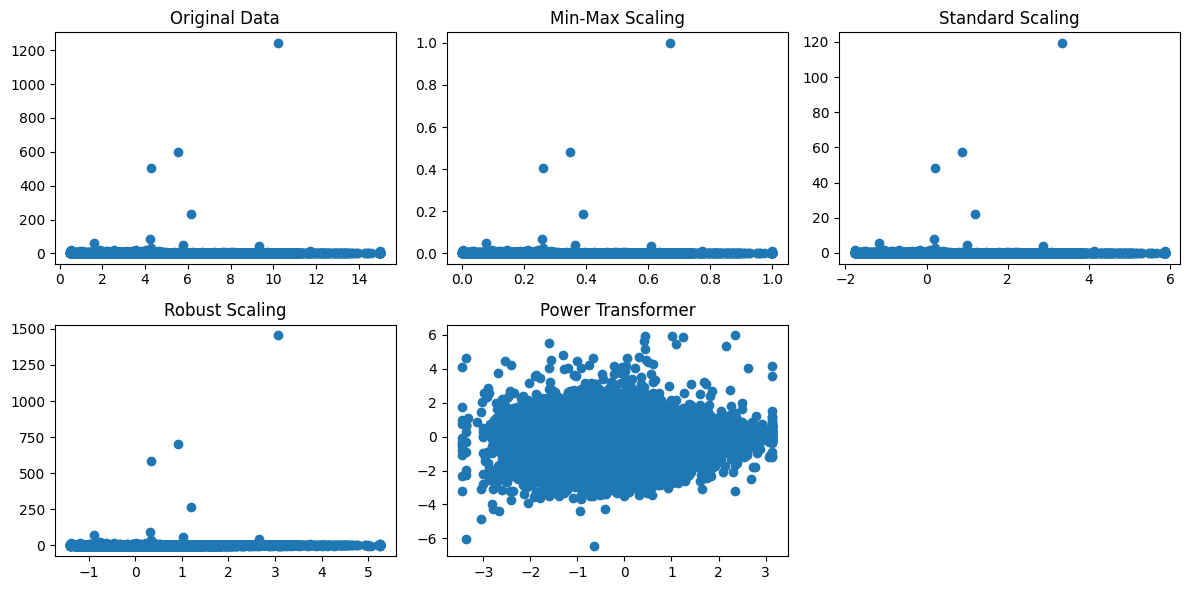

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer

# Initialize normalization methods
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
power_transformer = PowerTransformer(method = 'yeo-johnson')


# Apply normalization methods
normalized_min_max = min_max_scaler.fit_transform(selected_data)
normalized_standard = standard_scaler.fit_transform(selected_data)
normalized_robust = robust_scaler.fit_transform(selected_data)
normalized_power = power_transformer.fit_transform(selected_data)


# Create scatter plots for original and normalized data
plt.figure(figsize = (12, 6))

plt.subplot(2, 3, 1)
plt.scatter(selected_data['MedInc'], selected_data['AveOccup'])
plt.title("Original Data")

plt.subplot(2, 3, 2)
plt.scatter(normalized_min_max[:,0], normalized_min_max[:,1])
plt.title("Min-Max Scaling")

plt.subplot(2, 3, 3)
plt.scatter(normalized_standard[:,0], normalized_standard[:,1])
plt.title("Standard Scaling")

plt.subplot(2, 3, 4)
plt.scatter(normalized_robust[:,0], normalized_robust[:,1])
plt.title("Robust Scaling")

plt.subplot(2, 3, 5)
plt.scatter(normalized_power[:,0], normalized_power[:,1])
plt.title("Power Transformer")

plt.tight_layout()
plt.show()